## Labelling Project

- This needs to be able to produce a function with the following features
- Point it at an image path and upload an image
- Join dots round the image to make an approximate mask using polyfit
- Then use something like super pixels to refine the 

In [24]:
import requests
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

url = "https://i0.wp.com/theconstructor.org/wp-content/uploads/2014/12/Concrete-Blisters.jpg?resize=450%2C310&ssl=1"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
cv2.imwrite("semantic_image/" + "test_image_1" + ".png", np.array(img))




True

The image above we shall use it an example for complete instance segmentation. Lets make some other example images to label for a multi class problem to




In [25]:
import os
path = "./multiclass_classification"
if not os.path.exists(path):
    os.makedirs(path)
else:
    pass

examples = [r'https://www.scotsman.com/webimg/b25lY21zOmFmM2U5NGMyLTMxNDgtNGFhMS05MmRlLTQwNjc2NGM0Mjg0YToyMWI3MWI0OC02MDM3LTRiMTctYWVlMi1lMDFmOTUwY2FjYmM=.jpg?width=990&quality=65&enable=upscale',
       r'https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/330px-Cat_November_2010-1a.jpg',
       'https://ichef.bbci.co.uk/news/976/cpsprodpb/2B16/production/_128203011_gettyimages-1368246978.jpg.webp',
           'https://hips.hearstapps.com/hmg-prod/images/wolf-dog-breeds-siberian-husky-1570411330.jpg?crop=0.668xw:1.00xh;0.167xw,0&resize=1200:*',
            'https://thumbs.dreamstime.com/b/dog-golden-retriever-683752.jpg'
           ]

for count, example_url in enumerate(examples):
    try:
        print(example_url)
        response = requests.get(example_url)
        img = Image.open(BytesIO(response.content))
        cv2.imwrite("multiclass_classification/" + "test_image_" + str(count) + ".png", np.array(img))
    except:
        print('possible error in ' ,example_url)
            

https://www.scotsman.com/webimg/b25lY21zOmFmM2U5NGMyLTMxNDgtNGFhMS05MmRlLTQwNjc2NGM0Mjg0YToyMWI3MWI0OC02MDM3LTRiMTctYWVlMi1lMDFmOTUwY2FjYmM=.jpg?width=990&quality=65&enable=upscale
https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/330px-Cat_November_2010-1a.jpg
https://ichef.bbci.co.uk/news/976/cpsprodpb/2B16/production/_128203011_gettyimages-1368246978.jpg.webp
https://hips.hearstapps.com/hmg-prod/images/wolf-dog-breeds-siberian-husky-1570411330.jpg?crop=0.668xw:1.00xh;0.167xw,0&resize=1200:*
https://thumbs.dreamstime.com/b/dog-golden-retriever-683752.jpg


We now have some example images that we can look to make some various labelling tools with, and we shall intend to have a function that can perform:
- labelling of classes (inputs: image_path, outputs: csv of labelled categories)
- bounding box labels (inputs: image_path, csv of bounding box cooridnates and labell
- semantic labelling ( inputs : image_path , output will be some sort of JSON - need to research standard formats

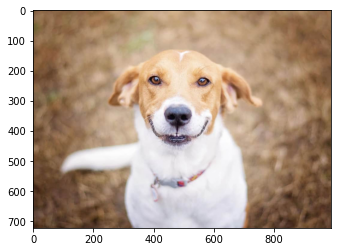

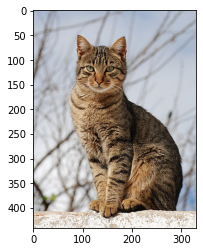

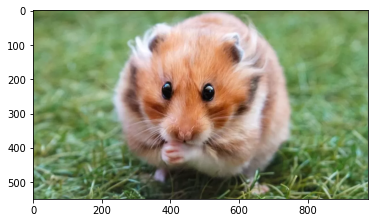

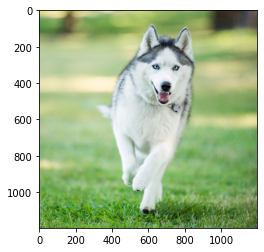

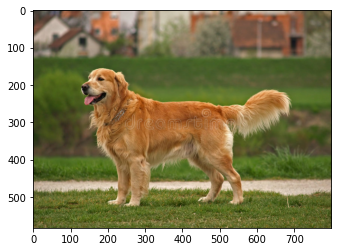

In [26]:
image_path = 'multiclass_classification/'

images_to_label = os.listdir(image_path)
labelled_images = []
for img in images_to_label:
    if img.endswith('.png'):
        labelled_images.append(img)

for name in labelled_images:
    im_path = os.path.join(image_path, name)
    im = cv2.imread(im_path)
    plt.imshow(im)
    plt.show()
    

## Label Classifier 

- The code below will create a widget that will open up the folder of images and allow you to manually classify which image belongs in each category. 
- Once you make a selection it will save your selection in a CSV file and this way you can label your images

There is a bug. If you are running this for the second time it will ask you to label the first image. Needs fixing at some point. Otherwise it will skip all the other images that are labelled and get to the one that you want 

In [7]:
import os
import csv
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from PIL import Image, ImageTk
import pandas as pd

class ImageCategorizer(tk.Tk):
    def __init__(self, categories, image_dir, csv_path):
        super().__init__()

        self.title("Image Categorizer")
        self.geometry("800x600")

        self.categories = categories
        self.image_dir = image_dir
        self.csv_path = csv_path
        self.image_paths = self.get_image_paths()
        self.current_image = 0

        self.create_widgets()
        self.load_image()

    def create_widgets(self):
        if self.image_paths == None:
            self.destroy()
        self.image_frame = ttk.Frame(self)
        self.image_frame.pack(fill=tk.BOTH, expand=True, pady=10)

        self.button_frame = ttk.Frame(self)
        self.button_frame.pack(fill=tk.BOTH, expand=True, pady=10)

        self.create_buttons()

    def get_image_paths(self):
        image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
        all_image_paths = [os.path.join(self.image_dir, f) for f in os.listdir(self.image_dir) if f.lower().endswith(image_extensions)]
        print(all_image_paths)
        print(self.csv_path)
        if os.path.exists(self.csv_path):
            df = pd.read_csv(self.csv_path, header=0 ,names = ['image_path', 'category'])
            labeled_images = list(df.image_path)
            print(labeled_images)
        else:
            labeled_images = []
        return [img for img in all_image_paths if img not in labeled_images]


        

    def load_image(self):
        if self.current_image < len(self.image_paths):
            image_path = self.image_paths[self.current_image]
            image = Image.open(image_path)
            image.thumbnail((400, 400))
            self.photo = ImageTk.PhotoImage(image)

            if hasattr(self, 'image_label'):
                self.image_label.configure(image=self.photo)
            else:
                self.image_label = ttk.Label(self.image_frame, image=self.photo)
                self.image_label.pack()
        else:
            self.quit()

    def create_buttons(self):
        for category in self.categories:
            button = ttk.Button(
                self.button_frame,
                text=category,
                command=lambda c=category: self.save_category(c)
            )
            button.pack(side=tk.LEFT, padx=10)

        quit_button = ttk.Button(
            self.button_frame,
            text="Quit",
            command=self.quit
        )
        quit_button.pack(side=tk.RIGHT, padx=10)

    def save_category(self, category):
        with open(self.csv_path, 'a', newline='') as csvfile:
            fieldnames = ['image_path', 'category']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            if self.current_image == 0 and not os.path.exists(self.csv_path):
                writer.writeheader()

            writer.writerow({'image_path': self.image_paths[self.current_image], 'category': category})

        print(f"Category '{category}' saved for '{self.image_paths[self.current_image]}'")
        self.current_image += 1
        self.load_image()



In [9]:
categories = ['Hamster', 'Cat', 'Dog']
image_directory = "multiclass_classification"  # Change this to your image directory
csv_path = "categorized_images.csv"
app = ImageCategorizer(categories, image_directory, csv_path)
app.mainloop()
app.destroy()


['multiclass_classification\\test_image_0.png', 'multiclass_classification\\test_image_1.png', 'multiclass_classification\\test_image_2.png', 'multiclass_classification\\test_image_3.png', 'multiclass_classification\\test_image_4.png']
categorized_images.csv
['multiclass_classification\\test_image_1.png', 'multiclass_classification\\test_image_2.png', 'multiclass_classification\\test_image_3.png', 'multiclass_classification\\test_image_0.png', 'multiclass_classification\\test_image_4.png']


## Bounding Box Segmentation

There is a bug. If you are running this for the second time it will ask you to label the first image. Needs fixing at some point. Otherwise it will skip all the other images that are labelled and get to the one that you want 

In [21]:
import os
import json
import csv
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import pandas as pd

class ImageCategorizer(tk.Tk):
    def __init__(self, categories, image_dir, csv_path, json_path):
        super().__init__()

        self.title("Image Categorizer")
        self.geometry("800x600")

        self.categories = categories
        self.image_dir = image_dir
        self.csv_path = csv_path
        self.json_path = json_path
        self.image_paths = self.get_image_paths()
        self.current_image = 0
        self.current_category = None
        self.start_x, self.start_y = None, None
        self.end_x, self.end_y = None, None
        self.rect_id = None

        self.create_widgets()
        self.load_image()

    def create_widgets(self):
        self.image_frame = ttk.Frame(self)
        self.image_frame.pack(fill=tk.BOTH, expand=True, pady=10)

        self.button_frame = ttk.Frame(self)
        self.button_frame.pack(fill=tk.BOTH, expand=True, pady=10)

        self.create_buttons()

#     def get_image_paths(self):
#         image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
#         all_image_paths = [os.path.join(self.image_dir, f) for f in os.listdir(self.image_dir) if f.lower().endswith(image_extensions)]

#         if os.path.exists(self.csv_path):
#             with open(self.csv_path, 'r', newline='') as csvfile:
#                 reader = csv.DictReader(csvfile)
#                 labeled_images = [row['image_path'] for row in reader]
#         else:
#             labeled_images = []

#         return [img for img in all_image_paths if img not in labeled_images]
    
    def get_image_paths(self):
        image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
        all_image_paths = [os.path.join(self.image_dir, f) for f in os.listdir(self.image_dir) if f.lower().endswith(image_extensions)]
        # print('XXXX', all_image_paths)
        # print(self.csv_path)
        if os.path.exists(self.csv_path):
            df = pd.read_csv(self.csv_path, header=0 ,names = ['image_path', 'category', 'start_x', 'start_y', 'end_x', 'end_y'])
            labeled_images = list(df.image_path)
        else:
            labeled_images = []
        for i in labeled_images:
            print(i)
            if i in all_image_paths:
                print('already labbeled')
            
        # print('YYY', [img for img in all_image_paths if img not in labeled_images])
        return [img for img in all_image_paths if img not in labeled_images]

    def load_image(self):
        if self.current_image < len(self.image_paths):
            image_path = self.image_paths[self.current_image]
            # print(image_path)
            image = Image.open(image_path)
            self.original_width, self.original_height = image.size
            image.thumbnail((np.array(image).shape[1], np.array(image).shape[0]), Image.ANTIALIAS)
            self.thumbnail_width, self.thumbnail_height = image.size
            self.photo = ImageTk.PhotoImage(image)
            # print(np.array(image).shape[0], image_path)

            if hasattr(self, 'canvas'):
                self.canvas.image = self.photo
                self.canvas.create_image(0, 0, anchor=tk.NW, image=self.photo)
            else:
                print(self.photo)
                self.canvas = tk.Canvas(self.image_frame, width=image.width, height=image.height)
                self.canvas.pack()
                self.canvas.image = self.photo
                self.canvas.create_image(0, 0, anchor=tk.NW, image=self.photo)
                self.canvas.bind("<Button-1>", self.on_start)
                self.canvas.bind("<B1-Motion>", self.on_motion)
                self.canvas.bind("<ButtonRelease-1>", self.on_end)
        else:
            self.quit()

    def create_buttons(self):
        for category in self.categories:
            button = ttk.Button(
                self.button_frame,
                text=category,
                command=lambda c=category: self.set_category(c)
            )
            button.pack(side=tk.LEFT, padx=10)

        # quit_button = ttk.Button(
        #     self.button_frame,
        #     text="Quit",
        #     command=self.quit
        # )
        # quit_button.pack(side=tk.RIGHT, padx=10)
        
        quit_button = ttk.Button(
            self.button_frame,
            text="Quit",
            command=self.destroy  # Change this line
        )
        quit_button.pack(side=tk.RIGHT, padx=10)


    def set_category(self, category):
        self.current_category = category
        print(f"Selected category: {category}")

    def on_start(self, event):
        self.start_x = event.x
        self.start_y = event.y

    def on_motion(self, event):
        if self.current_category is not None:
            if self.rect_id is not None:
                self.canvas.delete(self.rect_id)
            self.rect_id = self.canvas.create_rectangle(self.start_x, self.start_y, event.x, event.y,outline='red', width=2)
    def on_end(self, event):
        if self.current_category is None:
            print("Please select a category before drawing a bounding box.")
            return

        self.end_x = event.x
        self.end_y = event.y
        self.save_data()

    def save_data(self):
        scale_x = self.original_width / self.thumbnail_width
        scale_y = self.original_height / self.thumbnail_height

        start_x = int(self.start_x * scale_x)
        start_y = int(self.start_y * scale_y)
        end_x = int(self.end_x * scale_x)
        end_y = int(self.end_y * scale_y)

        with open(self.csv_path, 'a', newline='') as csvfile:
            fieldnames = ['image_path', 'category', 'start_x', 'start_y', 'end_x', 'end_y']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            if self.current_image == 0 and not os.path.exists(self.csv_path):
                writer.writeheader()

            writer.writerow({
                'image_path': self.image_paths[self.current_image],
                'category': self.current_category,
                'start_x': start_x,
                'start_y': start_y,
                'end_x': end_x,
                'end_y': end_y
            })

        data = {}
        if os.path.exists(self.json_path):
            with open(self.json_path, 'r') as jsonfile:
                data = json.load(jsonfile)

        data[self.image_paths[self.current_image]] = {
            'category': self.current_category,
            'start_x': self.start_x,
            'start_y': self.start_y,
            'end_x': self.end_x,
            'end_y': self.end_y
        }

        with open(self.json_path, 'w') as jsonfile:
            json.dump(data, jsonfile, indent=4)

        print(f"Category '{self.current_category}' and bounding box coordinates saved for '{self.image_paths[self.current_image]}'")
        self.current_image += 1
        self.current_category = None
        self.load_image()


In [27]:
categories = ['Hamster', 'Cat', 'Dog']
image_directory = "multiclass_classification"  # Change this to your image directory
csv_path = "boundingbox_images.csv"
json_path = "boundingbox_images.json"
app = ImageCategorizer(categories, image_directory, csv_path, json_path)
# try:
app.mainloop()
try:
    app.destroy()
except:
    pass


multiclass_classification\test_image_1.png
already labbeled
multiclass_classification\test_image_2.png
already labbeled
multiclass_classification\test_image_3.png
already labbeled
pyimage14
Selected category: Dog
Category 'Dog' and bounding box coordinates saved for 'multiclass_classification\test_image_0.png'
Selected category: Dog
Category 'Dog' and bounding box coordinates saved for 'multiclass_classification\test_image_4.png'


In [28]:

import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_images_with_bounding_boxes(json_path, image_dir):
    with open(json_path, 'r') as jsonfile:
        data = json.load(jsonfile)

    for image_path, info in data.items():
        img_path = os.path.join(image_dir, image_path)
        img = Image.open(img_path)
        print(np.array(img).shape)

        fig, ax = plt.subplots(1)
        ax.imshow(img)

        start_x = int(info['start_x'])
        start_y = int(info['start_y'])
        end_x = int(info['end_x'])
        end_y = int(info['end_y'])

        rect = patches.Rectangle(
            (start_x, start_y),
            end_x - start_x,
            end_y - start_y,
            linewidth=2,
            edgecolor='r',
            facecolor='none'
        )

        ax.add_patch(rect)
        plt.show()

(723, 990, 3)


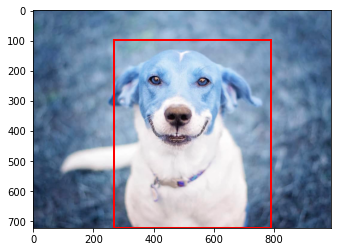

(441, 330, 3)


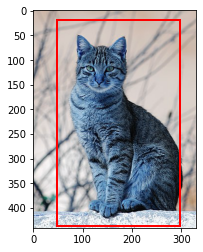

(549, 976, 3)


(1197, 1200, 3)


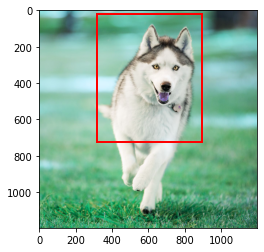

(583, 800, 3)


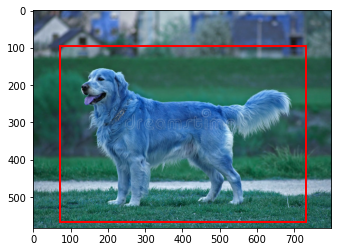

In [29]:
image_directory = ""  # Change this to your image directory
json_path = "boundingbox_images.json"
plot_images_with_bounding_boxes(json_path, image_directory)

Note the issue in the husky here was I did not expand the labellng box. This could be an issue if you have high resolution images bigger than your screen. That could do with a fix

Selected category: Dog
Segmentation mask for category 'Dog' saved for 'multiclass_classification\test_image_0.png'


In [27]:
import os
import json
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from PIL import Image, ImageTk, ImageDraw
import numpy as np
import pandas as pd
from IPython.display import display
from PIL import Image



class ImageCategorizer(tk.Tk):
    def __init__(self, categories, image_dir, json_path):
        super().__init__()

        self.title("Image Categorizer")
        self.geometry("800x600")

        self.categories = categories
        self.image_dir = image_dir
        self.json_path = json_path
        self.image_paths = self.get_image_paths()
        self.current_image = 0
        self.current_category = None
        self.mask = None

        self.create_widgets()
        self.load_image()

        if not os.path.exists(self.json_path):
            with open(self.json_path, 'w') as jsonfile:
                json.dump({}, jsonfile, indent=4)

    def create_widgets(self):
        self.image_frame = ttk.Frame(self)
        self.image_frame.pack(fill=tk.BOTH, expand=True, pady=10)

        self.button_frame = ttk.Frame(self)
        self.button_frame.pack(fill=tk.BOTH, expand=True, pady=10)

        self.create_buttons()

    def get_image_paths(self):
        image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
        all_image_paths = [os.path.join(self.image_dir, f) for f in os.listdir(self.image_dir) if f.lower().endswith(image_extensions)]

        if os.path.exists(self.json_path):
            with open(self.json_path, 'r') as jsonfile:
                data = json.load(jsonfile)
            labeled_images = list(data.keys())
        else:
            labeled_images = []

        return [img for img in all_image_paths if img not in labeled_images]

    def load_image(self):
        if self.current_image < len(self.image_paths):
            image_path = self.image_paths[self.current_image]
            image = Image.open(image_path)
            self.original_width, self.original_height = image.size
            image.thumbnail((np.array(image).shape[1], np.array(image).shape[0]), Image.ANTIALIAS)
            self.thumbnail_width, self.thumbnail_height = image.size
            self.photo = ImageTk.PhotoImage(image)

            if hasattr(self, 'canvas'):
                self.canvas.image = self.photo
                self.canvas.create_image(0, 0, anchor=tk.NW, image=self.photo)
            else:
                self.canvas = tk.Canvas(self.image_frame, width=image.width, height=image.height)
                self.canvas.pack()
                self.canvas.image = self.photo
                self.canvas.create_image(0, 0, anchor=tk.NW, image=self.photo)
                self.canvas.bind("<Button-1>", self.on_start)
                self.canvas.bind("<B1-Motion>", self.on_motion)
                self.canvas.bind_all("<KeyPress-Return>", self.on_end)

        else:
            self.quit()

    def create_buttons(self):
        for category in self.categories:
            button = ttk.Button(
                self.button_frame,
                text=category,
                command=lambda c=category: self.set_category(c)
            )
            button.pack(side=tk.LEFT, padx=10)

        quit_button = ttk.Button(
            self.button_frame,
            text="Quit",
            command=self.destroy
        )
        quit_button.pack(side=tk.RIGHT, padx=10)

    def set_category(self, category):
        self.current_category = category
        print(f"Selected category: {category}")

    def on_start(self, event):
        if self.current_category is None:
            print("Please select a category before drawing.")
            return

        if self.mask is None:
            self.mask = Image.new("1", (self.thumbnail_width, self.thumbnail_height), 0)

        self.last_x, self.last_y = event.x, event.y
        self.points = [(self.last_x, self.last_y)]

    def on_motion(self, event):
        if self.current_category is None:
            print("Please select a category before drawing.")
            return

        x, y = event.x, event.y
        self.canvas.create_line(self.last_x, self.last_y, x, y, fill="red", width=2)

        self.points.append((x, y))
        self.last_x, self.last_y = x, y

    def save_data(self):
        with open(self.json_path, 'r') as jsonfile:
            data = json.load(jsonfile)

        # Draw polygon on mask
        draw = ImageDraw.Draw(self.mask)
        draw.polygon(self.points, outline=1, fill=1)

        # Save mask as a separate PNG file
        mask_filename = os.path.splitext(os.path.basename(self.image_paths[self.current_image]))[0] + "_mask.png"
        mask_filepath = os.path.join('masks', mask_filename)
        self.mask.save(mask_filepath)

        data[self.image_paths[self.current_image]] = {
            'category': self.current_category,
            'mask': mask_filepath
        }

        with open(self.json_path, 'w') as jsonfile:
            json.dump(data, jsonfile, indent=4)

        print(f"Segmentation mask for category '{self.current_category}' saved for '{self.image_paths[self.current_image]}'")
        self.current_image += 1
        self.current_category = None
        self.mask = None
        self.load_image()

    def on_end(self, event):
        self.save_data()

categories = ['Hamster', 'Cat', 'Dog']
image_directory = "multiclass_classification"  # Change this to your image directory
json_path = "segmentation_images.json"
app = ImageCategorizer(categories, image_directory, json_path)
app.mainloop()
try:
    app.destroy()
except:
    pass

           


Selected category: Dog
Segmentation mask for category 'Dog' saved for 'multiclass_classification\test_image_0.png'
Selected category: Cat
Segmentation mask for category 'Cat' saved for 'multiclass_classification\test_image_1.png'
Selected category: Hamster
Segmentation mask for category 'Hamster' saved for 'multiclass_classification\test_image_2.png'
Selected category: Dog
Segmentation mask for category 'Dog' saved for 'multiclass_classification\test_image_3.png'
Selected category: Dog
Segmentation mask for category 'Dog' saved for 'multiclass_classification\test_image_4.png'


Displaying: test_image_0.png


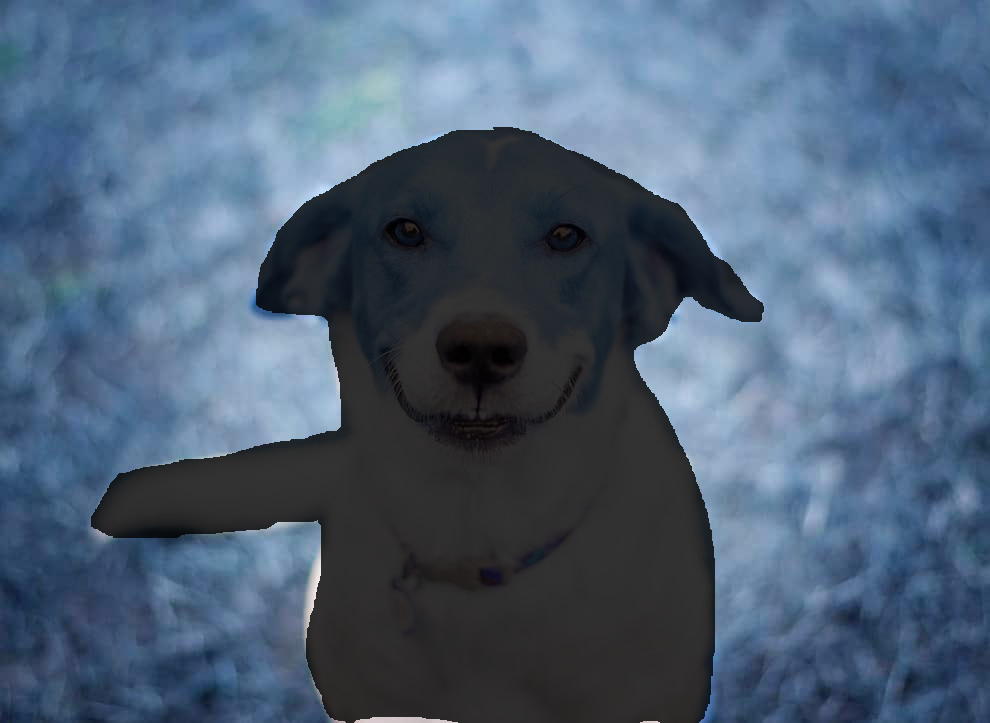

Displaying: test_image_1.png


Displaying: test_image_2.png


Displaying: test_image_3.png


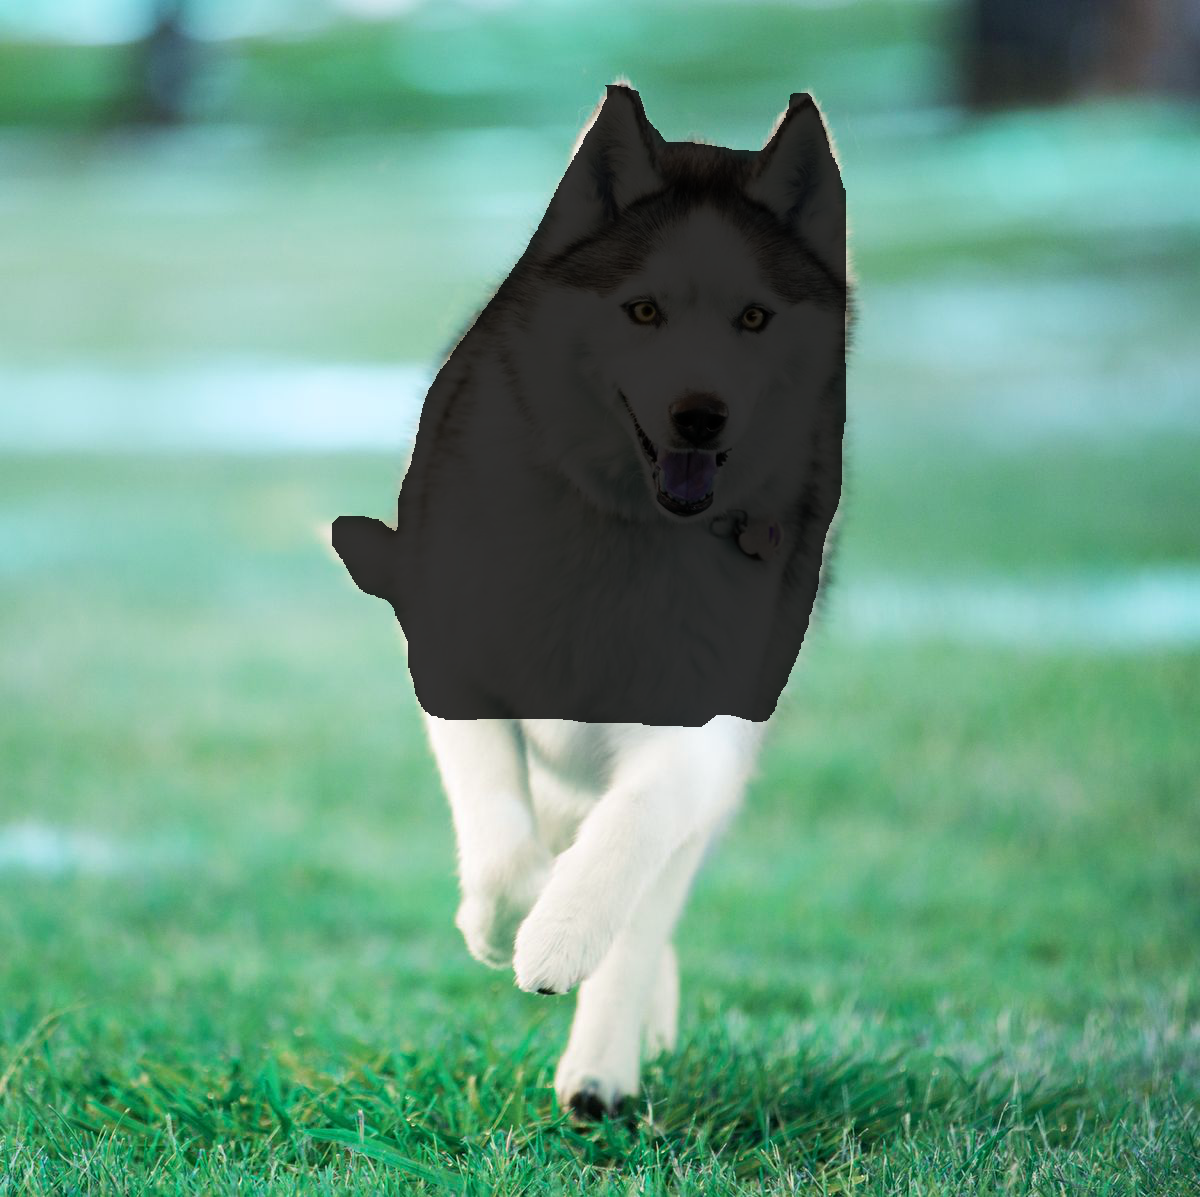

Displaying: test_image_4.png


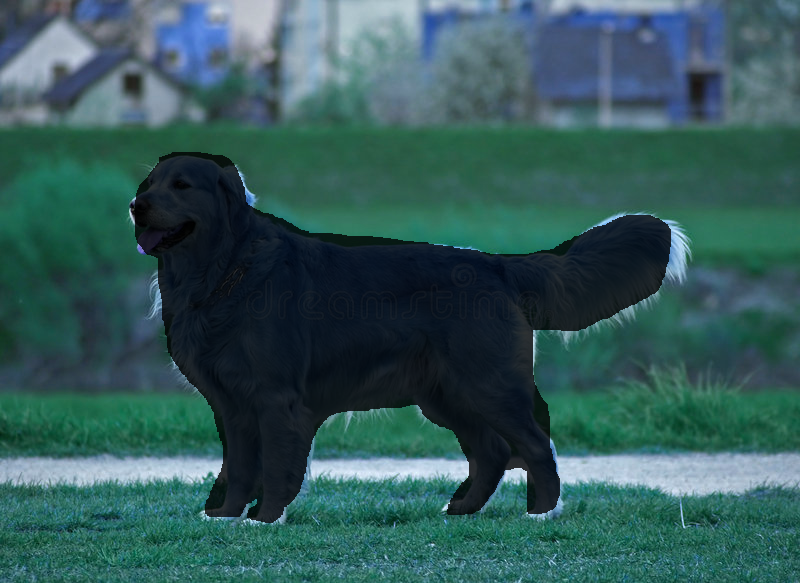

In [29]:
import os
from PIL import Image, ImageDraw

image_directory = "multiclass_classification"
mask_directory = "masks"
output_directory = "overlay_images"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(image_extensions) and not f.endswith("_mask.png")]

for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    mask_path = os.path.join(mask_directory, os.path.splitext(image_file)[0] + "_mask.png")

    if not os.path.exists(mask_path):
        print(f"No mask found for {image_file}")
        continue

    image = Image.open(image_path).convert("RGBA")
    mask = Image.open(mask_path).convert("L")

    # Create a transparent image with the same size as the mask
    transparent_mask = Image.new("RGBA", mask.size, (0, 0, 0, 0))

    # Draw the mask on the transparent image with the desired opacity
    draw = ImageDraw.Draw(transparent_mask)
    draw.bitmap((0, 0), mask, fill=(0, 0, 0, 204))  # 80% opaque is approximately 204/255

    # Combine the original image and the transparent mask
    combined_image = Image.alpha_composite(image, transparent_mask)

    # Save the combined image
    combined_image_path = os.path.join(output_directory, image_file)
    combined_image.save(combined_image_path)

overlay_directory = "overlay_images"

image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
image_files = [f for f in os.listdir(overlay_directory) if f.lower().endswith(image_extensions)]

for image_file in image_files:
    image_path = os.path.join(overlay_directory, image_file)
    image = Image.open(image_path)
    print(f"Displaying: {image_file}")
    display(image)
